In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.settings import EXTERNAL_DATA_DIR, RAW_DATA_DIR, PROCESSED_DATA_DIR

## Load Dataset

In [28]:
df = pd.read_csv('../{}/card_transactions.csv'.format(PROCESSED_DATA_DIR))
df.head(10)

,description,category,amount,time,title,details,id,_links,href
0,Pet Love*Order10947430,transaction,19990,2018-06-02T12:43:27Z,casa,"{'charges': {'count': 3, 'amount': 6663}, 'sub...",5b1290ef-27dc-4d61-bf99-d2853e09933c,{'self': {'href': 'https://prod-s0-feed.nubank...,nuapp://transaction/5b1290ef-27dc-4d61-bf99-d2...
1,Amazon.Com.Br,transaction,100,2018-05-31T23:01:36Z,educação,{'subcategory': 'card_not_present'},5b107ed0-1afa-4efe-afd4-cf8ef75c0abd,{'self': {'href': 'https://prod-s0-feed.nubank...,nuapp://transaction/5b107ed0-1afa-4efe-afd4-cf...
2,Tembici,transaction,2000,2018-05-24T11:35:37Z,serviços,{'subcategory': 'card_not_present'},5b06a38a-be23-421b-a01e-eab063d290f9,{'self': {'href': 'https://prod-s0-feed.nubank...,nuapp://transaction/5b06a38a-be23-421b-a01e-ea...
3,Ebanx-Spotify,transaction,1690,2018-05-15T14:27:42Z,outros,"{'lat': -23.5807334, 'lon': -46.684984, 'subca...",5afaee5f-4068-40f7-a7e7-6df587c66ec6,{'self': {'href': 'https://prod-s0-feed.nubank...,nuapp://transaction/5afaee5f-4068-40f7-a7e7-6d...
4,Outback Bz 51 Frei Can,transaction,8937,2018-05-06T22:54:56Z,restaurante,"{'lat': -23.5544201, 'lon': -46.6522945, 'subc...",5aef87c0-1cad-4c94-a0e5-bc2c13123e8e,{'self': {'href': 'https://prod-s0-feed.nubank...,nuapp://transaction/5aef87c0-1cad-4c94-a0e5-bc...
5,Monte Rei Delivery,transaction,805,2018-05-06T16:01:17Z,restaurante,"{'lat': -23.6172183, 'lon': -46.6341538, 'subc...",5aef26ce-d9fd-4f54-a680-75d62e9f451b,{'self': {'href': 'https://prod-s0-feed.nubank...,nuapp://transaction/5aef26ce-d9fd-4f54-a680-75...
6,Dia Loja,transaction,1074,2018-05-06T15:50:40Z,supermercado,"{'lat': -23.6172484, 'lon': -46.6341649, 'subc...",5aef2451-0003-4263-8026-b3a9276f898f,{'self': {'href': 'https://prod-s0-feed.nubank...,nuapp://transaction/5aef2451-0003-4263-8026-b3...
7,Tennessee Saude,transaction,4425,2018-05-06T15:38:36Z,supermercado,"{'lat': -23.6174069, 'lon': -46.6343829, 'subc...",5aef217c-fdf0-494a-b05b-f906ad812e47,{'self': {'href': 'https://prod-s0-feed.nubank...,nuapp://transaction/5aef217c-fdf0-494a-b05b-f9...
8,Almeida'S Bar,transaction,2700,2018-05-06T00:50:27Z,restaurante,"{'lat': -23.6174186, 'lon': -46.6342297, 'subc...",5aee5154-9f6a-4138-8a55-8f6adeb3f53f,{'self': {'href': 'https://prod-s0-feed.nubank...,nuapp://transaction/5aee5154-9f6a-4138-8a55-8f...
9,Pag*Tabuleirolua,transaction,1600,2018-05-05T23:23:11Z,restaurante,"{'lat': -23.5339943, 'lon': -46.6533928, 'subc...",5aee3ce0-cefe-4d11-b035-c3ba65f9d788,{'self': {'href': 'https://prod-s0-feed.nubank...,nuapp://transaction/5aee3ce0-cefe-4d11-b035-c3...


## Dataframe stats

In [29]:
df.shape

(499, 9)

In [30]:
df.dtypes

description    object
category       object
amount          int64
time           object
title          object
details        object
id             object
_links         object
href           object
dtype: object

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 9 columns):
description    499 non-null object
category       499 non-null object
amount         499 non-null int64
time           499 non-null object
title          499 non-null object
details        499 non-null object
id             499 non-null object
_links         499 non-null object
href           499 non-null object
dtypes: int64(1), object(8)
memory usage: 35.2+ KB


**Check if we have any duplicated data:**

In [32]:
df.duplicated().value_counts()

False    499
dtype: int64

**Converting date column from object into datetime:**

In [33]:
df['time'] = pd.to_datetime(df.time)

**Converting string column from object into string:**

In [34]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

**Filter out unneeded columns:**

In [35]:
columns = ['description', 'category', 'amount', 'time', 'title', 'details', 'id']
df = df[columns]

In [36]:
df.head()

,description,category,amount,time,title,details,id
0,Pet Love*Order10947430,transaction,19990,2018-06-02 12:43:27,casa,"{'charges': {'count': 3, 'amount': 6663}, 'sub...",5b1290ef-27dc-4d61-bf99-d2853e09933c
1,Amazon.Com.Br,transaction,100,2018-05-31 23:01:36,educação,{'subcategory': 'card_not_present'},5b107ed0-1afa-4efe-afd4-cf8ef75c0abd
2,Tembici,transaction,2000,2018-05-24 11:35:37,serviços,{'subcategory': 'card_not_present'},5b06a38a-be23-421b-a01e-eab063d290f9
3,Ebanx-Spotify,transaction,1690,2018-05-15 14:27:42,outros,"{'lat': -23.5807334, 'lon': -46.684984, 'subca...",5afaee5f-4068-40f7-a7e7-6df587c66ec6
4,Outback Bz 51 Frei Can,transaction,8937,2018-05-06 22:54:56,restaurante,"{'lat': -23.5544201, 'lon': -46.6522945, 'subc...",5aef87c0-1cad-4c94-a0e5-bc2c13123e8e


### Top categories by quantity of transations

In [37]:
top_categories_by_quantity = df['title'].value_counts()
top_categories_by_quantity.sort_values(ascending=False)

supermercado    193
restaurante     155
saúde            30
vestuário        24
outros           20
casa             19
transporte       17
serviços         17
educação          8
lazer             8
eletrônicos       5
viagem            3
Name: title, dtype: int64

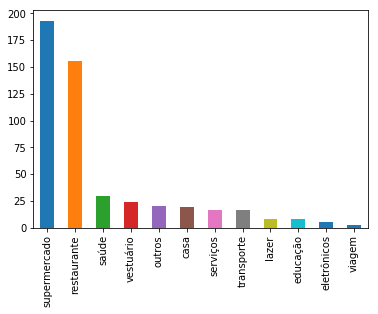

In [38]:
top_categories_by_quantity.plot(kind = 'bar')

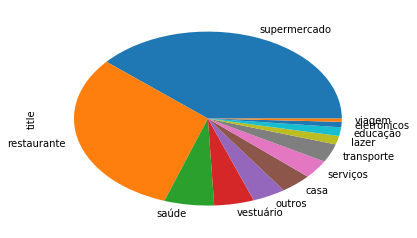

In [39]:
top_categories_by_quantity.plot(kind = 'pie')

In [40]:
top_categories_by_quantity.rank()

supermercado    12.0
restaurante     11.0
saúde           10.0
vestuário        9.0
outros           8.0
casa             7.0
serviços         5.5
transporte       5.5
lazer            3.5
educação         3.5
eletrônicos      2.0
viagem           1.0
Name: title, dtype: float64

### Top categories by amount of transations

In [41]:
top_categories_by_amount = df.groupby(['title']).count()['amount']
top_categories_by_amount.sort_values(ascending=False)

title
supermercado    193
restaurante     155
saúde            30
vestuário        24
outros           20
casa             19
transporte       17
serviços         17
lazer             8
educação          8
eletrônicos       5
viagem            3
Name: amount, dtype: int64

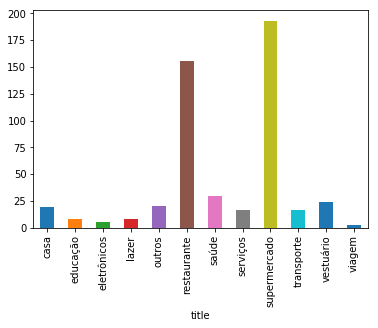

In [42]:
top_categories_by_amount.plot(kind = 'bar')

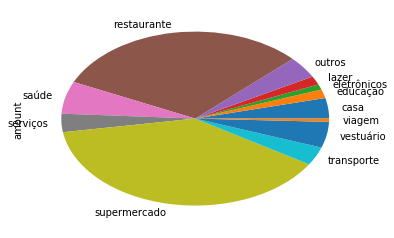

In [43]:
top_categories_by_amount.plot(kind = 'pie')

In [44]:
top_categories_by_amount.rank()

title
casa             7.0
educação         3.5
eletrônicos      2.0
lazer            3.5
outros           8.0
restaurante     11.0
saúde           10.0
serviços         5.5
supermercado    12.0
transporte       5.5
vestuário        9.0
viagem           1.0
Name: amount, dtype: float64